# Comparative Analysis of Goals Scored in Men's and Women's International Soccer Matches

## Introduction

As sports journalists specializing in soccer analysis, we are intrigued by an intuitive hypothesis: that more goals are scored in women's international soccer matches than in men's matches. Having closely followed both men's and women's competitions, this assumption could lead to an engaging investigative article for our audience. However, to substantiate this claim, a rigorous statistical analysis is necessary.

### Objective of the Analysis

The objective of this study is to statistically test whether the average number of goals scored in women's international soccer matches is greater than that of men's matches. We will conduct a hypothesis test to determine whether we can reject or fail to reject the null hypothesis at a 10% significance level. This analysis will focus exclusively on official FIFA World Cup matches since January 1, 2002.

### Hypotheses

To address our research question, we will formulate the following hypotheses:

- **Null Hypothesis ( \( H_0 \) )**: The mean number of goals scored in women's international soccer matches is the same as in men's matches.
- **Alternative Hypothesis ( \( H_1 \) )**: The mean number of goals scored in women's international soccer matches is greater than in men's matches.

### Data and Methodology

The data used for this analysis includes the results of all official international soccer matches for both men and women since January 1, 2002, collected from a reliable online source. These results are stored in two CSV files: `women_results.csv` for women's matches and `men_results.csv` for men's matches. We will assume that each match is independent, ignoring individual team performances over the course of the tournament for the sake of simplifying the statistical model.

The outcome of the test will be summarized in a Python dictionary, `result_dict`, which will contain:

- **p_val**: the p-value obtained from the hypothesis test
- **result**: a conclusion expressed as either "reject" or "fail to reject," based on the findings regarding the null hypothesis.

### Research Question

**Are more goals scored in women's international soccer matches than in men's matches?**

Through this methodology, we aim to answer this question rigorously by interpreting the available data using statistical testing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, norm
import pingouin as pg

In [2]:
#import files and load in dataframes
mens_df = pd.read_csv('Dataset/men_results.csv')
womens_df = pd.read_csv('Dataset/women_results.csv')

In [3]:
mens_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
womens_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


### Filtering the data

Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.

In [5]:
# Filter data for men's matches
mens_df["tournament"].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [6]:
mens_df["date"].dtypes

dtype('O')

In [7]:
# Convert the 'date' column to datetime format for better usability
mens_df["date"] = pd.to_datetime(mens_df["date"])

In [8]:
mens_df["date"].dtypes

dtype('<M8[ns]')

In [9]:
# Filter for FIFA World Cup matches
mens_worldCup = mens_df[mens_df["tournament"] == 'FIFA World Cup']

In [10]:
mens_worldCup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1311,1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1312,1312,1930-07-13,France,Mexico,4,1,FIFA World Cup
1313,1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1314,1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1315,1315,1930-07-15,Argentina,France,1,0,FIFA World Cup


In [11]:
# Filter for matches after January 1, 2002
mens_worldCup  = mens_df[mens_df["date"] > pd.Timestamp('2002-01-01')]

In [12]:
# Filter data for women's matches

In [13]:
womens_df["tournament"].unique()

array(['Euro', 'AFC Championship', 'UEFA Euro qualification',
       'OFC Championship', 'UEFA Euro', 'African Championship',
       'CONCACAF Championship', 'Copa América', 'FIFA World Cup',
       'CONCACAF Invitational Tournament', 'Algarve Cup', 'Olympic Games',
       'Four Nations Tournament', 'African Championship qualification',
       'CONCACAF Gold Cup qualification', 'CONCACAF Gold Cup',
       'AFC Asian Cup qualification', 'AFC Asian Cup', 'Cyprus Cup',
       'Olympic Games qualification', 'Friendly', 'SheBelieves Cup',
       'FIFA World Cup qualification', 'Tournament of Nations',
       'OFC Nations Cup qualification', 'African Cup of Nations',
       'OFC Nations Cup', 'Tournoi de France',
       "Basque Country Women's Cup",
       'African Cup of Nations qualification'], dtype=object)

In [14]:
womens_df["date"].dtypes

dtype('O')

In [15]:
# Convert the 'date' column to datetime format for better usability
womens_df["date"] = pd.to_datetime(womens_df["date"])

In [16]:
womens_worldCup = womens_df[(womens_df["tournament"] == 'FIFA World Cup') & (womens_df["date"] > pd.Timestamp('2002-01-01'))]

In [17]:
womens_worldCup

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


### Choosing the correct hypothesis test

In this scenario, we are comparing two independent groups, men and women, which requires a two-sample independent test. The two most commonly used tests for this purpose are:

- The unpaired t-test: A parametric test used when the data follows a normal distribution.
- The Wilcoxon-Mann-Whitney test: A non-parametric alternative to the unpaired t-test, used when the data does not meet the assumption of normality.
  
These tests allow us to assess whether there is a significant difference between the two groups.

We need to analyze the sample size and distribution in order to select the most appropriate test.

In [18]:
# Sample for women's data
womens_sample = womens_worldCup.shape
print(f"The women's DataFrame contains {womens_sample[0]} rows.")

The women's DataFrame contains 200 rows.


We estimate that a minimum of 30 data points is needed to prefer a parametric test.

In [19]:
# Sample for men's data
mens_sample = mens_worldCup.shape
print(f"The men's DataFrame contains {mens_sample[0]} rows.")

The men's DataFrame contains 19490 rows.


Now we need to check the normality of each distribution

In [20]:
# New column for total goals per match
womens_worldCup.loc[:,"Total_goals"] = womens_worldCup["home_score"] + womens_worldCup["away_score"]
mens_worldCup.loc[:,"Total_goals"] = mens_worldCup["home_score"] + mens_worldCup["away_score"]

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_2156/2392342256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  womens_worldCup.loc[:,"Total_goals"] = womens_worldCup["home_score"] + womens_worldCup["away_score"]
/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_2156/2392342256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mens_worldCup.loc[:,"Total_goals"] = mens_worldCup["home_score"] + mens_worldCup["away_score"]


In [21]:
mens_worldCup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Total_goals
24863,24863,2002-01-04,Bahrain,Finland,0,2,Prime Minister's Cup,2
24864,24864,2002-01-04,Egypt,Ghana,2,0,Friendly,2
24865,24865,2002-01-04,Martinique,Guadeloupe,1,3,Friendly,4
24866,24866,2002-01-05,Albania,North Macedonia,0,0,Prime Minister's Cup,0
24867,24867,2002-01-05,Kuwait,Zimbabwe,3,0,Friendly,3


In [22]:
womens_worldCup.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Total_goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


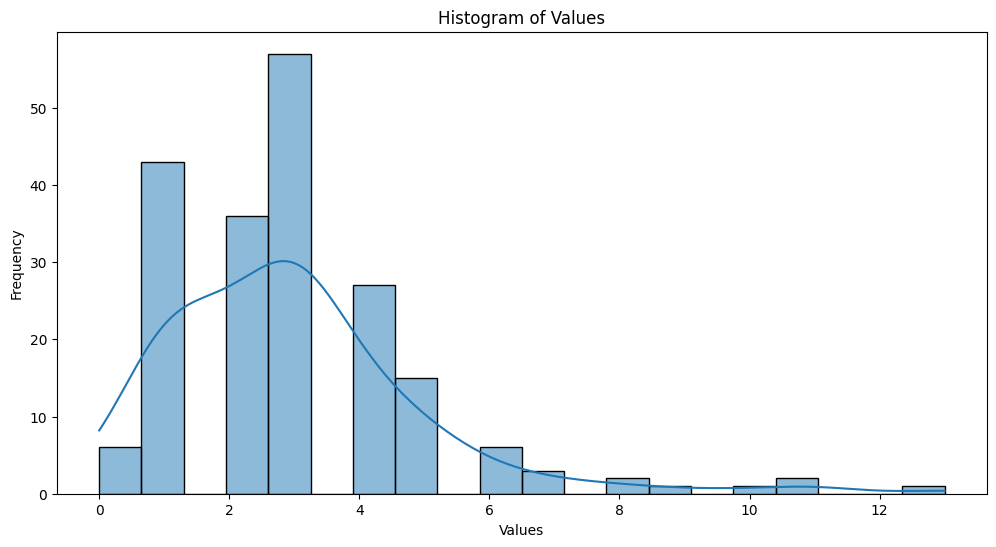

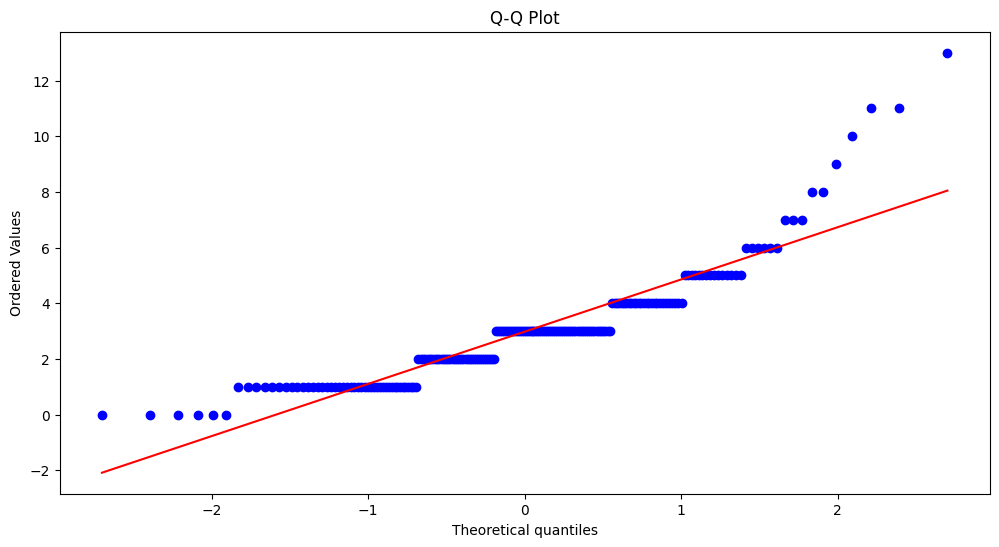

In [23]:
# Plot histogram to visualize the distribution of total goals for womens 
cible = womens_worldCup["Total_goals"]

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(cible, kde=True)  
plt.title('Histogram of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(cible, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot suggests the data reasonably follows a normal distribution, indicating parametric statistical tests can be appropriately applied.
While there are some deviations in the tails, the overall adherence to the reference line supports the normality assumption.

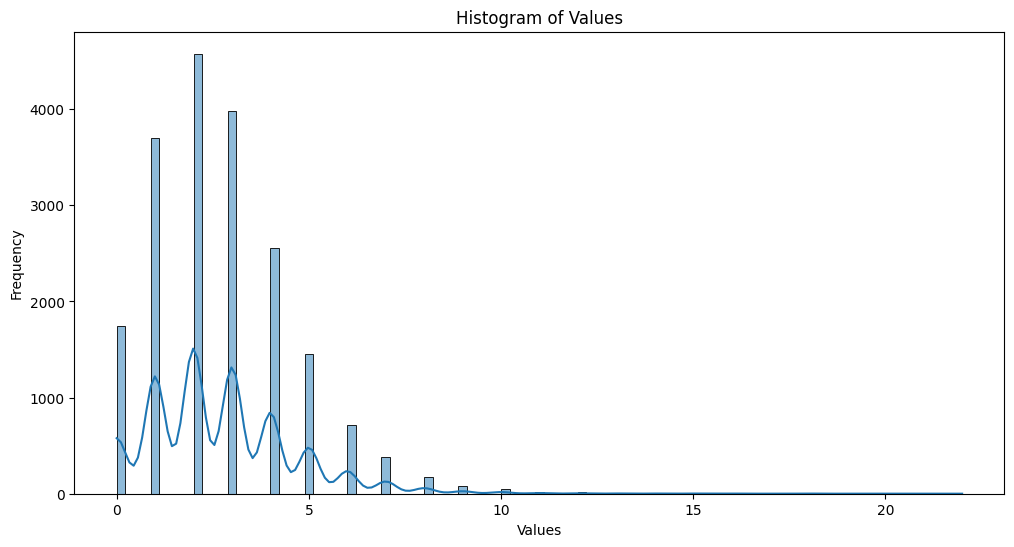

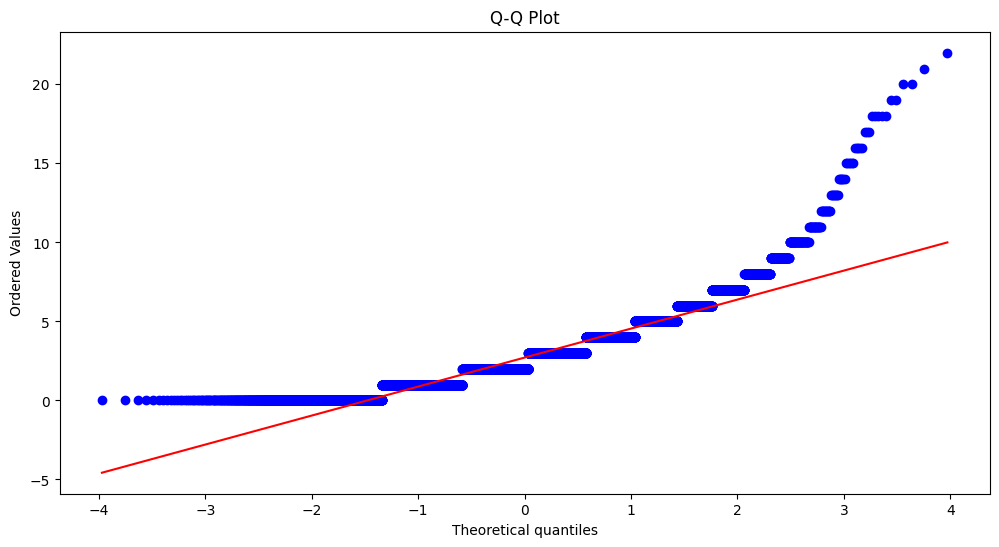

In [24]:
# Plot histogram to visualize the distribution of total goals for mens
cible = mens_worldCup["Total_goals"]

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(cible, kde=True)  
plt.title('Histogram of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(cible, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

The Q-Q plot suggests that the data deviates from normality, which may invalidate the use of parametric tests. To confirm this visual assessment, we can conduct a normality test, such as the Kolmogorov–Smirnov test or the Shapiro–Wilk test.

The Kolmogorov-Smirnov (K-S) test evaluates whether a dataset follows a normal distribution by testing the null hypothesis (H0) that the data is normally distributed. A p-value less than 0.05 indicates significant evidence to reject H0, suggesting that the data does not follow a normal distribution. Conversely, a p-value of 0.05 or higher suggests insufficient evidence to reject H0, implying that the data may be normally distributed.

In [25]:
# Kolmogorov-Smirnov test on mens goals
cible = mens_worldCup["Total_goals"]
ks_statistic, p_value = kstest(cible, 'norm')

print("K-S Statistic:", ks_statistic)
print("p-value:", p_value)

# Result interpretation
if p_value < 0.05:
    print("The data does not follow a normal distribution (p < 0.05)")
else:
    print("The data follows a normal distribution (p >= 0.05)")


K-S Statistic: 0.7516064187211853
p-value: 0.0
The data does not follow a normal distribution (p < 0.05)


In [26]:
# Kolmogorov-Smirnov test on womens goals
cible = womens_worldCup["Total_goals"]
ks_statistic, p_value = kstest(cible, 'norm')

print("K-S Statistic:", ks_statistic)
print("p-value:", p_value)

# Result interpretation
if p_value < 0.05:
    print("The data does not follow a normal distribution (p < 0.05)")
else:
    print("The data follows a normal distribution (p >= 0.05)")

K-S Statistic: 0.8113447460685429
p-value: 9.431656241073109e-144
The data does not follow a normal distribution (p < 0.05)


Given the results of the test and the visualizations from the histogram and Q-Q plot, we can now proceed with non-parametric testing since the data do not follow a normal distribution.

### Mann-Whitney U non-parametric test

In [29]:
# Create dataframes for test
womens_df = pd.DataFrame({'Goals': womens_worldCup["Total_goals"], 'Category': 'Women'})
mens_df = pd.DataFrame({'Goals': mens_worldCup["Total_goals"], 'Category': 'Men'})
df = pd.concat([womens_df, mens_df])

In [40]:
# Performing the Mann-Whitney U test - using only the Goals columns
statistic, p_value = stats.mannwhitneyu(
    womens_df['Goals'],  # Only the Goals column
    mens_df['Goals'],    # Only the Goals column
    alternative='greater'  # Specifying that we are testing if women score more goals
)

Text(0, 0.5, 'Number of Goals')

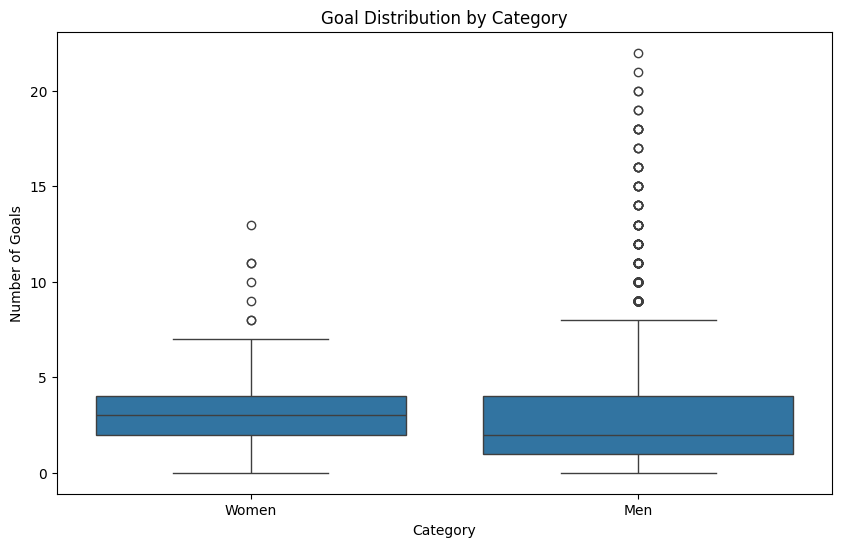

In [41]:
# Creating a visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Goals')
plt.title('Goal Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Goals')


In [42]:
# Displaying the results
print(f"U test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("\nInterpretation:")
if p_value < 0.05:
    print("We reject H0: there is a significant difference in the average number of goals.")
    print("Women's matches have, on average, more goals than men's matches.")
else:
    print("We cannot reject H0: no significant difference found.")

U test statistic: 2097621.0000
P-value: 0.0295

Interpretation:
We reject H0: there is a significant difference in the average number of goals.
Women's matches have, on average, more goals than men's matches.
